In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv("output0_copilot.csv")
df2 = pd.read_csv("output0.csv")
df3 = pd.read_csv("output0_nga2.csv")

In [5]:
df0 = pd.concat([df1, df2, df3], axis=0)

In [6]:
df0

,id,msg_timestamp,img_url,user_msg,bot_msg,sum_msg,date,runtime,feedback,user_id
0,1,1708918919467,https://www.kone.sg/Images/Marina%20Bay%20Sand...,Describe this image.,The image showcases a modern city skyline with...,The image showcases a modern city skyline with...,2024-02-26 03:42:25.000000,25.214590,like,1
1,2,1708918948293,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the city that you are desc...,singapore,singapore,2024-02-26 03:42:29.000000,0.964028,like,1
2,3,1708918962453,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the building complex that ...,Marina Bay Sands,Marina Bay Sands,2024-02-26 03:42:43.000000,1.078314,like,1
3,4,1708918969676,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the horizontal structure t...,Bridge,Bridge,2024-02-26 03:42:50.000000,0.809339,dislike,1
4,5,1708918975508,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the height of the sky park and how muc...,The Marina Bay Sands SkyPark is approximately ...,The Marina Bay Sands SkyPark is approximately ...,2024-02-26 03:43:10.000000,14.704392,like,1
...,...,...,...,...,...,...,...,...,...,...
67,68,1708922291810,https://cdn.static-economist.com/sites/default...,Why is it not fun?,It is not fun because it is a computer screen ...,It is not fun because it is a computer screen ...,2024-02-26 04:38:13.000000,1.809703,dislike,2
68,69,1708922305236,https://cdn.static-economist.com/sites/default...,What theme is it?,It is not possible to determine the theme of t...,It is not possible to determine the theme of t...,2024-02-26 04:38:30.000000,4.773698,dislike,2
69,70,1708922365788,https://cdn.static-economist.com/sites/default...,How many lines is this?,10,10,2024-02-26 04:39:26.000000,0.968031,dislike,2
70,71,1708922388117,https://cdn.static-economist.com/sites/default...,Which library do I need for this code?,twitter,twitter,2024-02-26 04:39:49.000000,0.801297,dislike,2


In [8]:
df1 = pd.read_csv("output1_nga_copilot_nga2.csv")

In [9]:
df1

,id,msg_timestamp,img_url,user_msg,bot_msg,sum_msg,date,runtime,feedback,user_id
0,1,1708924985892,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Describe this image.,A black and white photograph captures the RMS ...,A black and white photograph captures the RMS ...,2024-02-26 05:23:23.000000,17.218090,like,1
1,2,1708925006349,https://t0.gstatic.com/licensed-image?q=tbn:AN...,What is its name?,The name of the ship in the image is the RMS T...,The name of the ship in the image is the RMS T...,2024-02-26 05:23:29.000000,2.899502,like,1
2,3,1708925011374,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Where is it now?,It is in the ocean.,It is in the ocean.,2024-02-26 05:23:32.000000,1.295354,dislike,1
3,4,1708925020551,https://t0.gstatic.com/licensed-image?q=tbn:AN...,How many people survived this tragedy?,700,700,2024-02-26 05:23:41.000000,1.097980,dislike,1
4,5,1708925030102,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Is there any movie related to this incident?,titanic,titanic,2024-02-26 05:23:51.000000,1.084046,like,1
...,...,...,...,...,...,...,...,...,...,...
83,84,1708927239752,https://hellobark.com/wp-content/uploads/corgi...,What trick can they do?,maintaining their overall health and well-bein...,maintaining their overall health and well-bein...,2024-02-26 06:00:59.000000,19.309208,dislike,1
84,85,1708927325235,https://hellobark.com/wp-content/uploads/corgi...,Are they cute?,"Yes, Corgis are known for their adorable appea...","Yes, Corgis are known for their adorable appea...",2024-02-26 06:02:12.000000,7.030887,like,1
85,86,1708927361062,https://hellobark.com/wp-content/uploads/corgi...,What are possible names for them?,"Corgis can have a variety of names, ranging fr...","Corgis can have a variety of names, ranging fr...",2024-02-26 06:02:58.000000,17.627223,like,1
86,87,1708927468082,https://hellobark.com/wp-content/uploads/corgi...,Do corgis have different species?,"No, Corgis are a breed of dog, not a separate ...","No, Corgis are a breed of dog, not a separate ...",2024-02-26 06:04:31.000000,3.325975,like,1


In [31]:
user_msg1 = list(df[df["prompt"]==1]["user_msg"])
bot_msg1 = list(df[df["prompt"]==1]["bot_msg"])
user_len1 = [len(x) for x in user_msg1]
bot_len1 = [len(x) for x in bot_msg1]
print(user_len1)
print(bot_len1)
user_len1 = [user_len1[0]] + [user_len1[i] + bot_len1[i-1] for i in range(1, len(user_len1))]
print(user_len1)
df0["prompt_len"] = [len(x) for x in list(df0["user_msg"])]
df1["prompt_len"] = user_len1
df1


[20, 17, 16, 38, 44, 18, 21, 29, 33, 24, 46, 36, 43, 20, 20, 23, 27, 33, 42, 21, 25, 16, 20, 40, 39, 44, 45, 47, 62, 41, 37, 39, 20, 16, 36, 33, 19, 21, 30, 37, 18, 54, 61, 20, 25, 38, 20, 30, 44, 33, 29, 27, 29, 38, 34, 20, 33, 25, 26, 37, 40, 18, 15, 35, 18, 23, 20, 13, 16, 20, 21, 22, 39, 17, 25, 40, 40, 20, 18, 35, 27, 23, 23, 23, 14, 33, 33, 32]
[440, 53, 19, 3, 7, 10, 13, 7, 12, 17, 3, 104, 113, 55, 82, 10, 1, 16, 16, 7, 2, 8, 375, 736, 489, 71, 78, 6, 692, 888, 677, 577, 711, 138, 128, 318, 57, 78, 342, 119, 12, 69, 904, 546, 65, 45, 21, 129, 210, 271, 317, 97, 138, 551, 306, 400, 415, 1013, 971, 228, 495, 29, 2, 6, 13, 3, 35, 9, 32, 11, 21, 3, 5, 98, 85, 85, 4, 509, 374, 382, 688, 1056, 1099, 756, 250, 523, 54, 93]
[20, 457, 69, 57, 47, 25, 31, 42, 40, 36, 63, 39, 147, 133, 75, 105, 37, 34, 58, 37, 32, 18, 28, 415, 775, 533, 116, 125, 68, 733, 925, 716, 597, 727, 174, 161, 337, 78, 108, 379, 137, 66, 130, 924, 571, 103, 65, 51, 173, 243, 300, 344, 126, 176, 585, 326, 433, 440, 

,id,msg_timestamp,img_url,user_msg,bot_msg,sum_msg,date,runtime,feedback,user_id,prompt,prompt_len
0,1,1708924985892,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Describe this image.,A black and white photograph captures the RMS ...,A black and white photograph captures the RMS ...,2024-02-26 05:23:23.000000,17.218090,like,1,1,20
1,2,1708925006349,https://t0.gstatic.com/licensed-image?q=tbn:AN...,What is its name?,The name of the ship in the image is the RMS T...,The name of the ship in the image is the RMS T...,2024-02-26 05:23:29.000000,2.899502,like,1,1,457
2,3,1708925011374,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Where is it now?,It is in the ocean.,It is in the ocean.,2024-02-26 05:23:32.000000,1.295354,dislike,1,1,69
3,4,1708925020551,https://t0.gstatic.com/licensed-image?q=tbn:AN...,How many people survived this tragedy?,700,700,2024-02-26 05:23:41.000000,1.097980,dislike,1,1,57
4,5,1708925030102,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Is there any movie related to this incident?,titanic,titanic,2024-02-26 05:23:51.000000,1.084046,like,1,1,47
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,1708927239752,https://hellobark.com/wp-content/uploads/corgi...,What trick can they do?,maintaining their overall health and well-bein...,maintaining their overall health and well-bein...,2024-02-26 06:00:59.000000,19.309208,dislike,1,1,1122
84,85,1708927325235,https://hellobark.com/wp-content/uploads/corgi...,Are they cute?,"Yes, Corgis are known for their adorable appea...","Yes, Corgis are known for their adorable appea...",2024-02-26 06:02:12.000000,7.030887,like,1,1,770
85,86,1708927361062,https://hellobark.com/wp-content/uploads/corgi...,What are possible names for them?,"Corgis can have a variety of names, ranging fr...","Corgis can have a variety of names, ranging fr...",2024-02-26 06:02:58.000000,17.627223,like,1,1,283
86,87,1708927468082,https://hellobark.com/wp-content/uploads/corgi...,Do corgis have different species?,"No, Corgis are a breed of dog, not a separate ...","No, Corgis are a breed of dog, not a separate ...",2024-02-26 06:04:31.000000,3.325975,like,1,1,556


In [33]:
df0["prompt"] = 0
df1["prompt"] = 1

In [34]:
df = pd.concat([df0, df1], axis = 0)
df

,id,msg_timestamp,img_url,user_msg,bot_msg,sum_msg,date,runtime,feedback,user_id,prompt,prompt_len
0,1,1708918919467,https://www.kone.sg/Images/Marina%20Bay%20Sand...,Describe this image.,The image showcases a modern city skyline with...,The image showcases a modern city skyline with...,2024-02-26 03:42:25.000000,25.214590,like,1,0,20
1,2,1708918948293,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the city that you are desc...,singapore,singapore,2024-02-26 03:42:29.000000,0.964028,like,1,0,53
2,3,1708918962453,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the building complex that ...,Marina Bay Sands,Marina Bay Sands,2024-02-26 03:42:43.000000,1.078314,like,1,0,105
3,4,1708918969676,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the horizontal structure t...,Bridge,Bridge,2024-02-26 03:42:50.000000,0.809339,dislike,1,0,64
4,5,1708918975508,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the height of the sky park and how muc...,The Marina Bay Sands SkyPark is approximately ...,The Marina Bay Sands SkyPark is approximately ...,2024-02-26 03:43:10.000000,14.704392,like,1,0,62
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,1708927239752,https://hellobark.com/wp-content/uploads/corgi...,What trick can they do?,maintaining their overall health and well-bein...,maintaining their overall health and well-bein...,2024-02-26 06:00:59.000000,19.309208,dislike,1,1,1122
84,85,1708927325235,https://hellobark.com/wp-content/uploads/corgi...,Are they cute?,"Yes, Corgis are known for their adorable appea...","Yes, Corgis are known for their adorable appea...",2024-02-26 06:02:12.000000,7.030887,like,1,1,770
85,86,1708927361062,https://hellobark.com/wp-content/uploads/corgi...,What are possible names for them?,"Corgis can have a variety of names, ranging fr...","Corgis can have a variety of names, ranging fr...",2024-02-26 06:02:58.000000,17.627223,like,1,1,283
86,87,1708927468082,https://hellobark.com/wp-content/uploads/corgi...,Do corgis have different species?,"No, Corgis are a breed of dog, not a separate ...","No, Corgis are a breed of dog, not a separate ...",2024-02-26 06:04:31.000000,3.325975,like,1,1,556


In [35]:
df["user_len"] = df.apply(lambda row: len(row["user_msg"]), axis= 1)
df["bot_len"] = df.apply(lambda row: len(row["bot_msg"]), axis= 1)

In [36]:
df

,id,msg_timestamp,img_url,user_msg,bot_msg,sum_msg,date,runtime,feedback,user_id,prompt,prompt_len,user_len,bot_len
0,1,1708918919467,https://www.kone.sg/Images/Marina%20Bay%20Sand...,Describe this image.,The image showcases a modern city skyline with...,The image showcases a modern city skyline with...,2024-02-26 03:42:25.000000,25.214590,like,1,0,20,20,672
1,2,1708918948293,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the city that you are desc...,singapore,singapore,2024-02-26 03:42:29.000000,0.964028,like,1,0,53,53,9
2,3,1708918962453,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the building complex that ...,Marina Bay Sands,Marina Bay Sands,2024-02-26 03:42:43.000000,1.078314,like,1,0,105,105,16
3,4,1708918969676,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the name of the horizontal structure t...,Bridge,Bridge,2024-02-26 03:42:50.000000,0.809339,dislike,1,0,64,64,6
4,5,1708918975508,https://www.kone.sg/Images/Marina%20Bay%20Sand...,What is the height of the sky park and how muc...,The Marina Bay Sands SkyPark is approximately ...,The Marina Bay Sands SkyPark is approximately ...,2024-02-26 03:43:10.000000,14.704392,like,1,0,62,62,456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,1708927239752,https://hellobark.com/wp-content/uploads/corgi...,What trick can they do?,maintaining their overall health and well-bein...,maintaining their overall health and well-bein...,2024-02-26 06:00:59.000000,19.309208,dislike,1,1,1122,23,756
84,85,1708927325235,https://hellobark.com/wp-content/uploads/corgi...,Are they cute?,"Yes, Corgis are known for their adorable appea...","Yes, Corgis are known for their adorable appea...",2024-02-26 06:02:12.000000,7.030887,like,1,1,770,14,250
85,86,1708927361062,https://hellobark.com/wp-content/uploads/corgi...,What are possible names for them?,"Corgis can have a variety of names, ranging fr...","Corgis can have a variety of names, ranging fr...",2024-02-26 06:02:58.000000,17.627223,like,1,1,283,33,523
86,87,1708927468082,https://hellobark.com/wp-content/uploads/corgi...,Do corgis have different species?,"No, Corgis are a breed of dog, not a separate ...","No, Corgis are a breed of dog, not a separate ...",2024-02-26 06:04:31.000000,3.325975,like,1,1,556,33,54


In [37]:
df[df["prompt"]==1]

,id,msg_timestamp,img_url,user_msg,bot_msg,sum_msg,date,runtime,feedback,user_id,prompt,prompt_len,user_len,bot_len
0,1,1708924985892,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Describe this image.,A black and white photograph captures the RMS ...,A black and white photograph captures the RMS ...,2024-02-26 05:23:23.000000,17.218090,like,1,1,20,20,440
1,2,1708925006349,https://t0.gstatic.com/licensed-image?q=tbn:AN...,What is its name?,The name of the ship in the image is the RMS T...,The name of the ship in the image is the RMS T...,2024-02-26 05:23:29.000000,2.899502,like,1,1,457,17,53
2,3,1708925011374,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Where is it now?,It is in the ocean.,It is in the ocean.,2024-02-26 05:23:32.000000,1.295354,dislike,1,1,69,16,19
3,4,1708925020551,https://t0.gstatic.com/licensed-image?q=tbn:AN...,How many people survived this tragedy?,700,700,2024-02-26 05:23:41.000000,1.097980,dislike,1,1,57,38,3
4,5,1708925030102,https://t0.gstatic.com/licensed-image?q=tbn:AN...,Is there any movie related to this incident?,titanic,titanic,2024-02-26 05:23:51.000000,1.084046,like,1,1,47,44,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,1708927239752,https://hellobark.com/wp-content/uploads/corgi...,What trick can they do?,maintaining their overall health and well-bein...,maintaining their overall health and well-bein...,2024-02-26 06:00:59.000000,19.309208,dislike,1,1,1122,23,756
84,85,1708927325235,https://hellobark.com/wp-content/uploads/corgi...,Are they cute?,"Yes, Corgis are known for their adorable appea...","Yes, Corgis are known for their adorable appea...",2024-02-26 06:02:12.000000,7.030887,like,1,1,770,14,250
85,86,1708927361062,https://hellobark.com/wp-content/uploads/corgi...,What are possible names for them?,"Corgis can have a variety of names, ranging fr...","Corgis can have a variety of names, ranging fr...",2024-02-26 06:02:58.000000,17.627223,like,1,1,283,33,523
86,87,1708927468082,https://hellobark.com/wp-content/uploads/corgi...,Do corgis have different species?,"No, Corgis are a breed of dog, not a separate ...","No, Corgis are a breed of dog, not a separate ...",2024-02-26 06:04:31.000000,3.325975,like,1,1,556,33,54


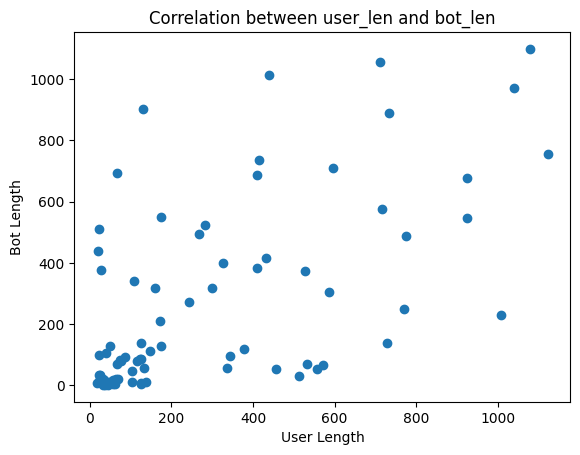

In [45]:
# Scatter plot
plt.scatter(df[df["prompt"]==1]['prompt_len'], df[df["prompt"]==1]['bot_len'])
plt.title('Correlation between user_len and bot_len')
plt.xlabel('User Length')
plt.ylabel('Bot Length')
plt.show()


In [43]:
correlation_coefficient = df[df["prompt"]==1]['prompt_len'].corr(df[df["prompt"]==1]['bot_len'])
print(f"Correlation coefficient: {correlation_coefficient}")


Correlation coefficient: 0.6327720765780558
